In [196]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# importing dataset

df = pd.read_csv('data_1.csv')

In [198]:
# displaying top 5 rows of the dataset

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [199]:
# checking shape of the dataset

df.shape

(301, 9)

In [200]:
# checking information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [201]:
# describing the dataset

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [202]:
# checking unique values of Fuel_type column

df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [203]:
# checking unique values of Seller_type column

df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [204]:
# checking unique values of transmission column

df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [205]:
# checking unique values of Owner column

df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [206]:
# checking unique values of Owner column

df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [207]:
# Dropping the Car_Name column as it has many unique values and our dataset is small

df.drop('Car_Name',axis=1,inplace=True)

In [208]:
# Checking for null values

df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [209]:
# Checking for duplicates

df.duplicated().sum()

2

In [210]:
# Dropping the duplicates

df = df.drop_duplicates()

In [211]:
# Now duplicates are not present

df.duplicated().sum()

0

In [212]:
# Handling outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

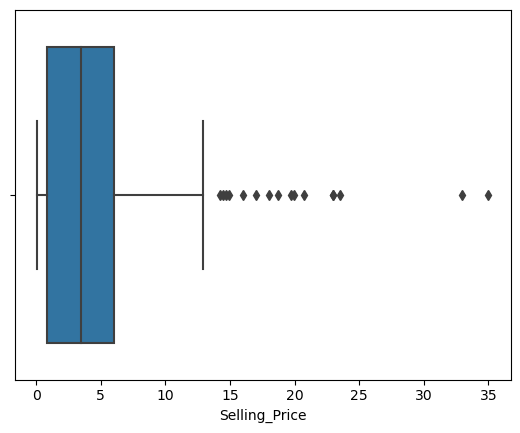

In [213]:
sns.boxplot(df.Selling_Price)

In [214]:
IQR1 = np.percentile(df['Selling_Price'],75)-np.percentile(df['Selling_Price'],25)

upper_threshold = np.percentile(df['Selling_Price'],75) + 1.5 * IQR1
lower_threshold = np.percentile(df['Selling_Price'],25) - 1.5 * IQR1

print('Upper threshold: ',upper_threshold)
print('Lower threshold: ',lower_threshold)

upper1 = np.where(df['Selling_Price']>upper_threshold)
lower1 = np.where(df['Selling_Price']<lower_threshold)

Upper threshold:  13.725000000000001
Lower threshold:  -6.875


In [215]:
# Removed outliers

df = df.drop(df[(df['Selling_Price']>upper_threshold)].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

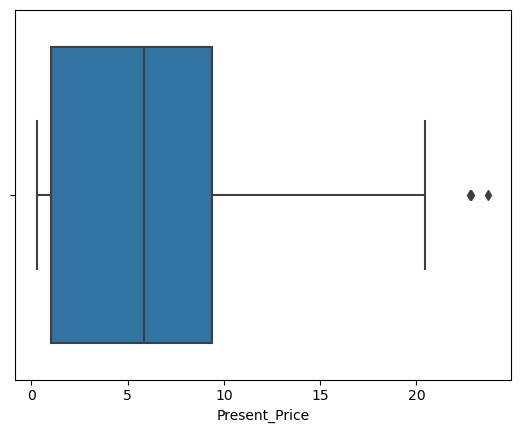

In [216]:
sns.boxplot(df.Present_Price)

In [217]:
IQR2 = np.percentile(df['Present_Price'],75)-np.percentile(df['Present_Price'],25)

upper_threshold = np.percentile(df['Present_Price'],75) + 1.5 * IQR2
lower_threshold = np.percentile(df['Present_Price'],25) - 1.5 * IQR2

print('Upper threshold: ',upper_threshold)
print('Lower threshold: ',lower_threshold)

upper1 = np.where(df['Present_Price']>upper_threshold)
lower1 = np.where(df['Present_Price']<lower_threshold)

Upper threshold:  21.97
Lower threshold:  -11.55


In [218]:
# Removed outliers

df = df.drop(df[(df['Present_Price']>upper_threshold)].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kms_Driven'>

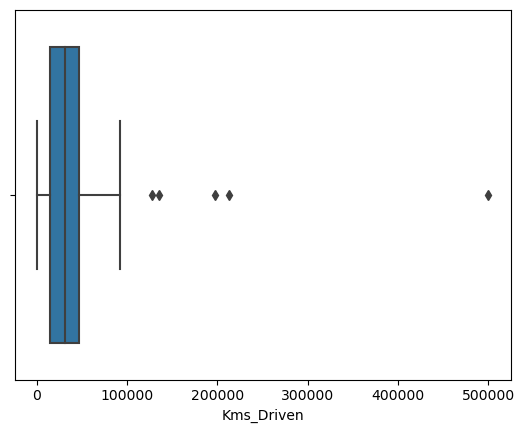

In [219]:
sns.boxplot(df.Kms_Driven)

In [220]:
IQR3 = np.percentile(df['Kms_Driven'],75)-np.percentile(df['Kms_Driven'],25)

upper_threshold = np.percentile(df['Kms_Driven'],75) + 1.5 * IQR3
lower_threshold = np.percentile(df['Kms_Driven'],25) - 1.5 * IQR3

print('Upper threshold: ',upper_threshold)
print('Lower threshold: ',lower_threshold)

upper1 = np.where(df['Kms_Driven']>upper_threshold)
lower1 = np.where(df['Kms_Driven']<lower_threshold)

Upper threshold:  94448.75
Lower threshold:  -32669.25


In [221]:
# Removed outliers

df = df.drop(df[(df['Kms_Driven']>upper_threshold)].index)

In [222]:
# Data is clean as there are no null values and no outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

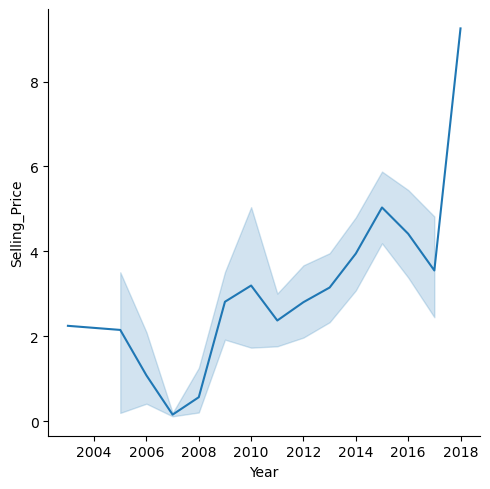

In [223]:
# Plotting selling price over years

fig = plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')
plt.show()

In [224]:
# Converting the years column into no.of years

df['Current_year'] =2023
df['Years'] = df['Current_year'] - df.Year
df.drop(['Year','Current_year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [225]:
# Creating dummies for the categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


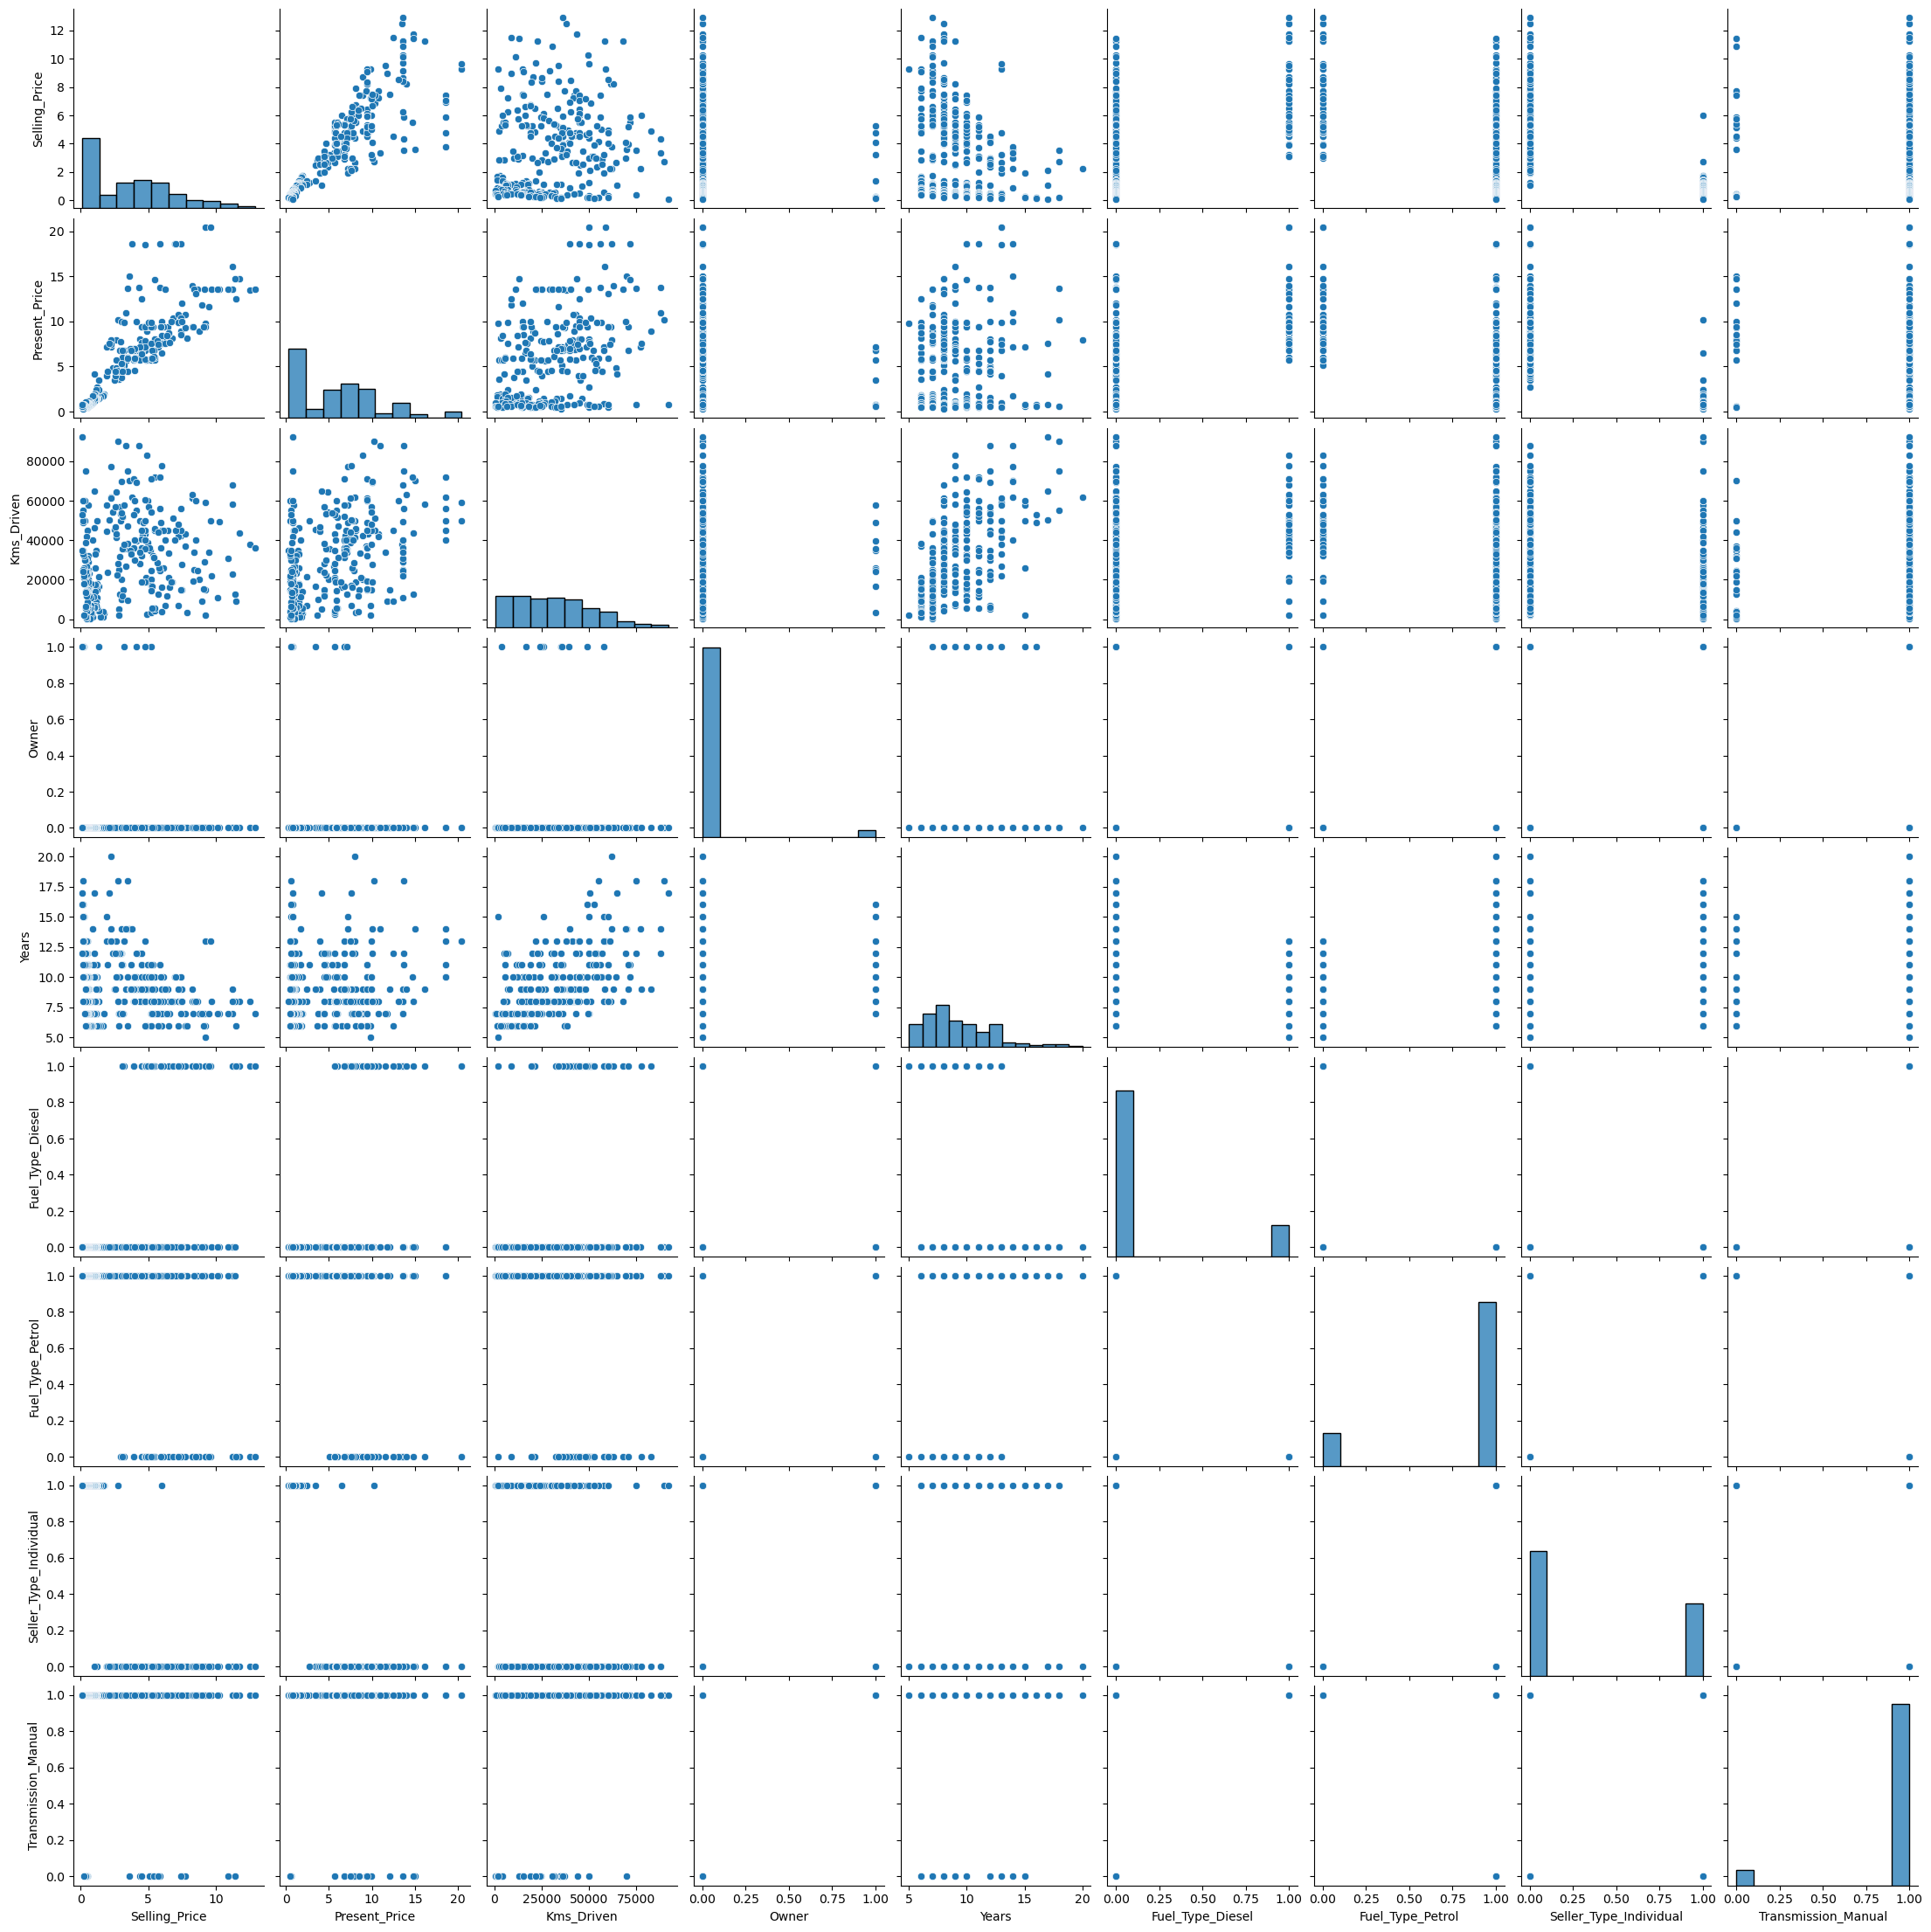

In [226]:
# Plotting a pair plot

sns.pairplot(df)

<AxesSubplot:>

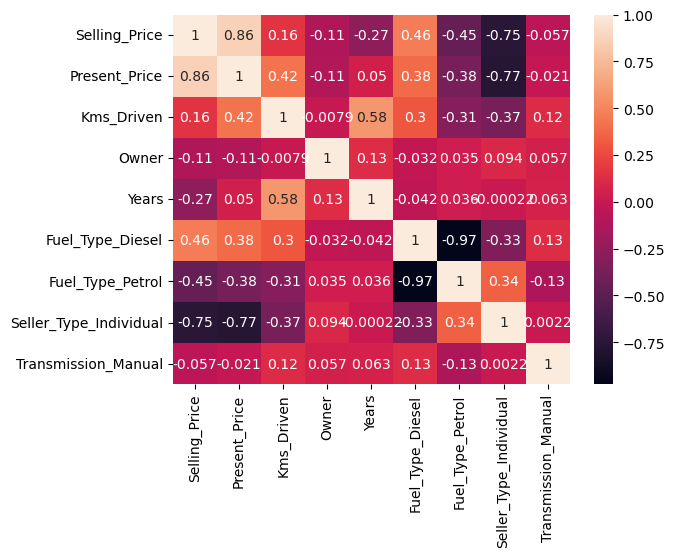

In [227]:
# Plotting heatmap to check correlation

sns.heatmap(df.corr(),annot=True)

In [228]:
# Identifying the independent and dependent variable

X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [229]:
X.shape,y.shape

((275, 8), (275,))

In [230]:
# Splitting the data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [231]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((220, 8), (55, 8), (220,), (55,))

In [232]:
# Scaling the values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [233]:
# Model building

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9106235050076834

In [237]:
# Hyperparameter tuning of RadomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)
rf=RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)
rf_random.fit(X_train,y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [239]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [240]:
y_pred = rf_random.predict(X_test)

In [241]:
# Model evaluation

In [242]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))

MAE:  0.5340128886694113


In [243]:
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))

MSE:  0.6061790818480018


In [244]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  0.7785750328953542
